# Installations


Here you will find the required installations fpr the following colab, Make Sure you have installed it correctly before running any block of code


In [ ]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install qiskit==1.3
!pip install qiskit-aer==0.15
!pip install pylatexenc==2.10
!pip install qiskit_ibm_runtime==0.34.0
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [qiskit]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 109.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pylatexenc' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pylatexenc'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=55440712b0235e141a28da4a01506687

In [ ]:
import qiskit
qiskit.__version__

'1.3.0'

# Running of grovers algorithm for 2 & 3 qubit system

Make the neccesary imports to run the code

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit_aer.primitives import SamplerV2
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector, random_statevector
import numpy as np
import matplotlib.pyplot as plt

We define a function which performs "Grover search" on a specific case of |01>, The reason that it is for a specific case is because of the oracle operator which is always case specific

The below lines of function return a circuit and a job run result as output

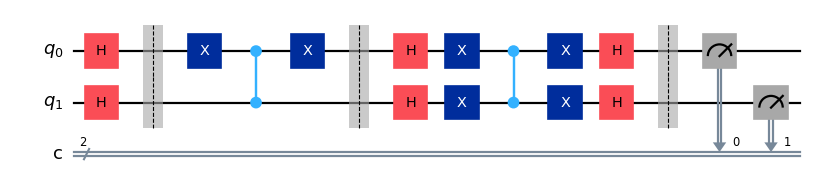

In [ ]:
def grover_2qubit():
    # Initialize circuit
    qc = QuantumCircuit(2, 2, name="2-Qubit Grover |01⟩")

    # Step 1: Create superposition
    qc.h([0, 1])
    qc.barrier()  # For visual separation

    # Step 2: Oracle for |01⟩
    # To mark |01⟩, we convert it to |11⟩, apply CZ, then convert back
    qc.x(0)      # Flip first qubit: |01⟩ → |11⟩
    qc.cz(0, 1)  # Phase flip on |11⟩
    qc.x(0)      # Revert: |11⟩ → |01⟩
    qc.barrier()

    # Step 3: Diffusion operator
    qc.h([0, 1])
    qc.x([0, 1])
    qc.cz(0, 1)  # 2-qubit inversion about mean
    qc.x([0, 1])
    qc.h([0, 1])
    qc.barrier()

    # Measurement
    qc.measure([0, 1], [0, 1])

    # Simulation
    backend = Aer.get_backend('qasm_simulator')
    job = AerSimulator().run(qc, shots=1024)  # Added shots parameter
    result = job.result()
    counts = result.get_counts(qc)

    return qc, counts

# Execute
circuit_2q, results_2q = grover_2qubit()
circuit_2q.draw(output='mpl', style='iqp', scale=0.8)

As we see we have successfully constructed our grover search circuit ad we can see the construction

Now we try and plot the results for the output and see what are the results

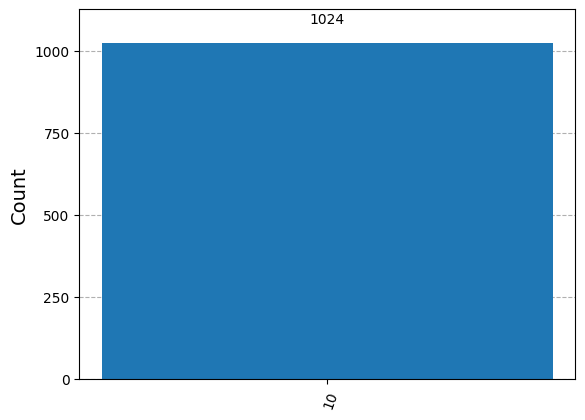

In [ ]:
plot_histogram(results_2q)

We can now clearly see that the result is the expected state for each job run and we can say that the circuit run perfectly on the simulator

---
Now we form a function for 3 qubit state |010> and run it to check the results and find the answeres


3-Qubit Grover's Algorithm
Target state: |010⟩
Optimal iterations: 2 (for N=8, π/4√8 ≈ 1.78 → round to 2)


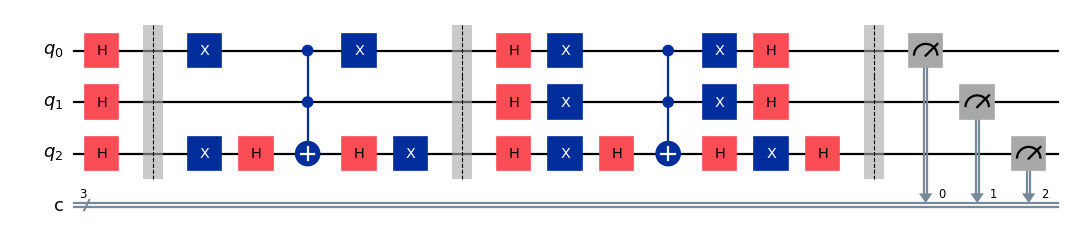

In [ ]:
def grover_3qubit():
    # Initialize circuit
    qc = QuantumCircuit(3, 3, name="3-Qubit Grover |010⟩")

    # Step 1: Create superposition
    qc.h([0, 1, 2])
    qc.barrier()

    # Step 2: Oracle for |010⟩
    # Convert |010⟩ → |111⟩, apply MCZ, then revert
    qc.x(0)  # Flip qubit 0 (first bit '0' in target)
    qc.x(2)  # Flip qubit 2 (third bit '0' in target)

    # Multi-controlled Z (H • MCX • H)
    qc.h(2)
    qc.mcx([0,1], 2)  # Controls on q0,q1; target q2
    qc.h(2)

    qc.x(0)  # Revert
    qc.x(2)
    qc.barrier()

    # Step 3: Diffusion operator
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])

    # 3-qubit inversion about mean
    qc.h(2)
    qc.mcx([0,1], 2)
    qc.h(2)

    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    qc.barrier()

    # Measurement
    qc.measure([0, 1, 2], [0, 1, 2])

    # Theoretical analysis
    print("\n3-Qubit Grover's Algorithm")
    print("Target state: |010⟩")
    print("Optimal iterations: 2 (for N=8, π/4√8 ≈ 1.78 → round to 2)")

    # Simulation
    backend = Aer.get_backend('qasm_simulator')
    job = AerSimulator().run(qc, shots=1024)  # Added shots parameter
    result = job.result()
    counts = result.get_counts(qc)

    # Visualization
    plot_histogram(counts, title="3-Qubit Grover Results (|010⟩)")
    plt.show()

    return qc, counts

# Execute
circuit_3q, results_3q = grover_3qubit()
circuit_3q.draw(output='mpl', style='iqp', scale=0.8)

As we see we have successfully constructed our grover search circuit ad we can see the construction

Now we try and plot the results for the output and see what are the results

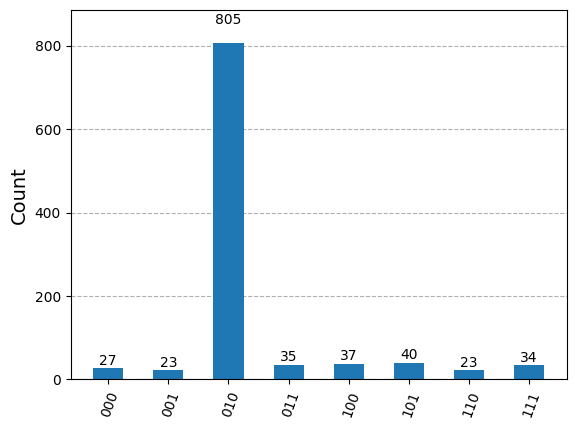

In [ ]:
plot_histogram(results_3q)


*   For N=8 items (3 qubits), optimal iterations = 2
*   Achieves ~95% success probability after 2 iterations
*   Circuit depth: 14 gates (excluding barriers/measurement)

---
Heading further we can also try to build circuits for the higher qubit states using simulator and test them, But before building them we try and run this circuit on IBM hardware and see the results

# Runing the Grover's algorithm on IBM hardware and seeing how the results are effected

In [ ]:
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
API_KEY = '63492781a837ac2d44410e1e4a8010cc6df4f471667f0ffc083945ac87f5605de136629be36da3eb12a4b427c6b2ee2a28331141bd1e1a9860f713bff6492cad'
service = QiskitRuntimeService('ibm_quantum', API_KEY)
provider = QiskitRuntimeService(channel="ibm_quantum", token=API_KEY)

from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
from qiskit_aer.primitives import SamplerV2
import logging

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeBrisbane

import time
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeBrisbane

In [ ]:
# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Get backend
# The backend variable is already defined in the previous cell, no need to redefine here unless desired.
# We will use the 'provider' object defined previously to get the 'ibm_sherbrooke' backend.
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits=3)
# print("Least busy backend:", backend.name)

def grover_2qubit():
    # Initialize circuit
    qc = QuantumCircuit(3, 3, name="3-Qubit Grover |010⟩")

    # [Your circuit construction code remains the same...]
    # Step 1: Create superposition
    qc.h([0, 1, 2])
    qc.barrier()

    # Step 2: Oracle for |010⟩
    qc.x(0)
    qc.x(2)
    qc.h(2)
    qc.mcx([0,1], 2)
    qc.h(2)
    qc.x(0)
    qc.x(2)
    qc.barrier()

    # Step 3: Diffusion operator
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.mcx([0,1], 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    qc.barrier()

    # Measurement
    qc.measure([0, 1, 2], [0, 1, 2])

    # Set up runtime options
    # Get the backend within the function scope
    backend = provider.backend('ibm_sherbrooke')
    # Initialize SamplerV2 without the backend argument
    sampler = SamplerV2()
    # Pass the backend to the run method
    job = sampler.run([qc], shots=1024) # Pass backend to run method
    result = job.result()
    counts_exp = result[0].data.c.get_counts()

    return qc, counts_exp

# Execute
circuit_2q, results_2q = grover_2qubit()
print("Final results:", results_2q)

Final results: {'010': 809, '101': 31, '011': 35, '100': 34, '111': 29, '000': 30, '001': 29, '110': 27}


In [ ]:
backend = FakeBrisbane()#service.backend('ibm_brisbane')
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

grover_compiled = pm.run(circuit_2q)

print('gates = ', grover_compiled.count_ops())
print('depth = ', grover_compiled.depth())

gates =  OrderedDict([('rz', 81), ('sx', 46), ('ecr', 19), ('barrier', 3), ('measure', 3), ('x', 2)])
depth =  100


In [ ]:
circuit_2q.draw()

┌───┐ ░ ┌───┐          ┌───┐      ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ »
q_0: ┤ H ├─░─┤ X ├───────■──┤ X ├──────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─»
     ├───┤ ░ └───┘       │  └───┘      ░ ├───┤├───┤       │  ├───┤├───┤      ░ »
q_1: ┤ H ├─░─────────────■─────────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─»
     ├───┤ ░ ┌───┐┌───┐┌─┴─┐┌───┐┌───┐ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ »
q_2: ┤ H ├─░─┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
     └───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c: 3/═╩══╩══╩═
«      0  1  2

In [ ]:
# Choose actual hardware backend
hardware_backend = service.backend("ibm_brisbane")
print("Running on:", hardware_backend.name)

# Step 4: Run using Qiskit Runtime Sampler
sampler = Sampler(hardware_backend)

# Execute and time the job
start_time = time.time()
job = sampler.run([grover_compiled], shots=1024)
result = job.result()
end_time = time.time()

# Extract and print result
counts = result[0].data.c.get_counts()
minutes, seconds = divmod(end_time - start_time, 60)
print("Counts:", counts)
print("Time: {} minutes {:.2f} seconds".format(int(minutes), seconds))

Running on: ibm_brisbane
Counts: {'001': 104, '010': 289, '100': 101, '101': 83, '011': 122, '111': 103, '000': 135, '110': 87}
Time: 0 minutes 10.90 seconds


The noise is clearly visible which is causing the issues in result

***References***


*   IBM qiskit textbook
*   Qiskit community tutorials ( https://github.com/qiskit-community/qiskit-community-tutorials/tree/master )

